# K-means Clustering

### Import resources and display image

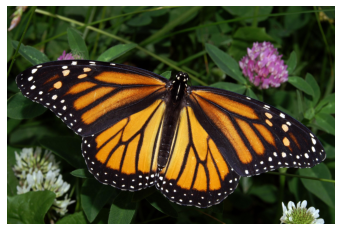

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off');

In [6]:
image.shape

(2000, 3008, 3)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [7]:
pixel_vals.shapee

(6016000, 3)

### Implement k-means clustering

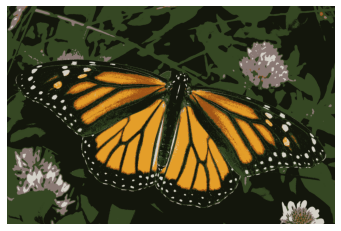

In [13]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)
plt.axis('off');

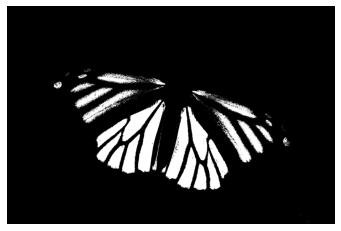

In [14]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==0, cmap='gray')
plt.axis('off');

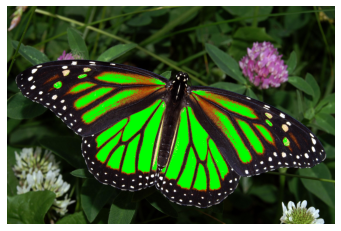

In [15]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
plt.axis('off');

## `Kmeans` using `sklearn`

In [16]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=k, random_state=10, n_init=10)
km.fit_transform(pixel_vals)

array([[ 46.913494, 216.94423 , 150.0444  ,  23.93199 , 290.25638 ,
        128.76105 ],
       [ 46.913494, 216.94423 , 150.0444  ,  23.93199 , 290.25638 ,
        128.76105 ],
       [ 46.913494, 216.94423 , 150.0444  ,  23.93199 , 290.25638 ,
        128.76105 ],
       ...,
       [ 21.879322, 237.08626 , 173.15654 ,  47.210964, 314.85944 ,
        143.7721  ],
       [ 21.082933, 236.70724 , 172.94737 ,  47.179287, 314.78708 ,
        143.10349 ],
       [ 21.082933, 236.70724 , 172.94737 ,  47.179287, 314.78708 ,
        143.10349 ]], dtype=float32)

In [22]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [23]:
km.cluster_centers_

array([[ 19.52945 ,  22.422146,  12.027727],
       [228.35623 , 158.57141 ,  41.20098 ],
       [137.56024 , 121.36272 , 115.27919 ],
       [ 52.96005 ,  71.46512 ,  35.01953 ],
       [212.25568 , 209.47485 , 200.5701  ],
       [160.42249 ,  84.51806 ,  22.99015 ]], dtype=float32)

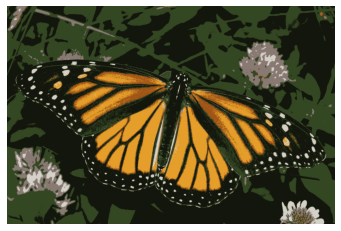

In [25]:
# convert data into 8-bit values
centers = np.uint8(km.cluster_centers_)
segmented_data = centers[km.labels_.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)
plt.axis('off');